In [3]:

# Convolutional Neural Network (CNN)
## this notbook demonstrates using a CNN Model to classify 7 facial Emotions and correctly predict them using images or frames
## This notbook uses keras and tensorflow to load the data from Directory und feed them to the Sequential model
from keras import models, layers
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras_preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    zoom_range=0.2,
    rotation_range= 0.2,
    vertical_flip= True
)
train_generator = train_datagen.flow_from_directory(
    '/Users/anasarodake/train',
    target_size=(160, 160),
    batch_size=128,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator()
validation_generator = test_datagen.flow_from_directory(
    '/Users/anasarodake/test',
    target_size=(160, 160),
    batch_size=128,
    class_mode='categorical'
)





classes = ["0", "1", "2", "3", "4", "5"]
class_names = ["angry", "fear", "happy", "neutral", "sad", "surprised"]
train_dir = "/Users/anasarodake/train"
val_dir = "/Users/anasarodake/test"

BATCH_SZIZE = 128
IMG_SIZE = (160, 160)
# load the training and Validation data from Directory
# the used dataset:  FER-2013/Kaggle        https://www.kaggle.com/datasets/msambare/fer2013?select=test



# create the model and its layers
# Note that the Images are not getting rescaled
# instade of it we are using a Rescalinglayer in the model after the input layer


model = models.Sequential()
model.add(layers.InputLayer(input_shape=(160, 160, 3)))
model.add(layers.Rescaling(scale=1. / 255.))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))



model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(6, activation="softmax"))

model.compile(tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(train_generator, epochs=6,
                    validation_data=validation_generator)




Found 28273 images belonging to 6 classes.
Found 7067 images belonging to 6 classes.
Epoch 1/6


2022-05-12 07:45:16.541137: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


221/221 [==============================] - ETA: 0s - loss: 1.7537 - accuracy: 0.2506

2022-05-12 07:48:34.768921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


221/221 [==============================] - 210s 933ms/step - loss: 1.7537 - accuracy: 0.2506 - val_loss: 1.6941 - val_accuracy: 0.2898
Epoch 2/6
221/221 [==============================] - 186s 833ms/step - loss: 1.6934 - accuracy: 0.2900 - val_loss: 1.6252 - val_accuracy: 0.3284
Epoch 3/6
221/221 [==============================] - 176s 791ms/step - loss: 1.6449 - accuracy: 0.3219 - val_loss: 1.5923 - val_accuracy: 0.3455
Epoch 4/6
221/221 [==============================] - 179s 810ms/step - loss: 1.5817 - accuracy: 0.3568 - val_loss: 1.4786 - val_accuracy: 0.4174
Epoch 5/6
221/221 [==============================] - 196s 882ms/step - loss: 1.5155 - accuracy: 0.3933 - val_loss: 1.4099 - val_accuracy: 0.4398
Epoch 6/6
221/221 [==============================] - 160s 721ms/step - loss: 1.4746 - accuracy: 0.4108 - val_loss: 1.3797 - val_accuracy: 0.4466


In [4]:
history2 = model.fit(train_generator, epochs=6,
                    validation_data=validation_generator)

Epoch 1/6
221/221 [==============================] - 332s 1s/step - loss: 1.4405 - accuracy: 0.4306 - val_loss: 1.3532 - val_accuracy: 0.4732
Epoch 2/6
221/221 [==============================] - 200s 903ms/step - loss: 1.4107 - accuracy: 0.4410 - val_loss: 1.3537 - val_accuracy: 0.4636
Epoch 3/6
221/221 [==============================] - 210s 945ms/step - loss: 1.3898 - accuracy: 0.4507 - val_loss: 1.3254 - val_accuracy: 0.4726
Epoch 4/6
221/221 [==============================] - 192s 863ms/step - loss: 1.3730 - accuracy: 0.4590 - val_loss: 1.3293 - val_accuracy: 0.4630
Epoch 5/6
221/221 [==============================] - 218s 981ms/step - loss: 1.3438 - accuracy: 0.4726 - val_loss: 1.2816 - val_accuracy: 0.4978
Epoch 6/6
221/221 [==============================] - 208s 932ms/step - loss: 1.3303 - accuracy: 0.4817 - val_loss: 1.2694 - val_accuracy: 0.5036


In [5]:
history3 = model.fit(train_generator, epochs=6,
                    validation_data=validation_generator)

Epoch 1/6
221/221 [==============================] - 192s 861ms/step - loss: 1.3176 - accuracy: 0.4843 - val_loss: 1.2655 - val_accuracy: 0.5012
Epoch 2/6
221/221 [==============================] - 213s 958ms/step - loss: 1.3050 - accuracy: 0.4908 - val_loss: 1.2513 - val_accuracy: 0.5064
Epoch 3/6
221/221 [==============================] - 203s 910ms/step - loss: 1.2847 - accuracy: 0.5038 - val_loss: 1.2466 - val_accuracy: 0.5127
Epoch 4/6
221/221 [==============================] - 176s 790ms/step - loss: 1.2708 - accuracy: 0.5038 - val_loss: 1.2555 - val_accuracy: 0.5121
Epoch 5/6
221/221 [==============================] - 176s 795ms/step - loss: 1.2660 - accuracy: 0.5070 - val_loss: 1.2525 - val_accuracy: 0.5088
Epoch 6/6
221/221 [==============================] - 185s 836ms/step - loss: 1.2573 - accuracy: 0.5123 - val_loss: 1.2388 - val_accuracy: 0.5134


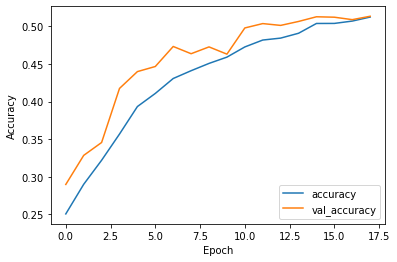

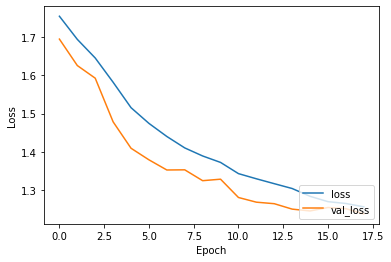

In [6]:
acc = history.history['accuracy']+history2.history['accuracy']+history3.history['accuracy']
val_acc = history.history['val_accuracy']+history2.history['val_accuracy']+history3.history['val_accuracy']

plt.plot(acc, label='accuracy')
plt.plot(val_acc, label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

loss = history.history['loss']+history2.history['loss']+history3.history['loss']
val_loss = history.history['val_loss']+history2.history['val_loss']+history3.history['val_loss']

plt.plot(loss, label='loss')
plt.plot(val_loss, label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [12]:
# Run the following cells to see the live detection of facial emotions
import cv2
import numpy as np
import tensorflow as tf






def closeAll():
    cv2.namedWindow("win")
    cv2.startWindowThread()
    cv2.destroyAllWindows()


#thest the model on one image
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
frame = cv2.imread("test.png")
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for x, y, w, h in faces:
    roi_gray = gray[y:y + h, x: x + w]
    roi_color = frame[y:y + h, x: x + w]
    cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 11, 55), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:

        print("Face not detected")
    else:
        for (ex, ey, ew, eh) in facess:  #show found faces and the predicted emotions
            face_roi = roi_color[ey: ey + eh, ex: ex + ew]
            final_image = cv2.resize(face_roi, (160, 160))
            final_image = np.expand_dims(final_image, axis=0)  #need 4th Dimention
            #final_image = final_image / 255.0  #normalize
            predictions = model.predict(final_image)
            print(class_names[np.argmax(predictions)])

# Run the live cam
font = cv2.FONT_HERSHEY_PLAIN
#set the rectangle background to white
rectangle_bgr = (255, 255, 255)
#make a black image
img = np.zeros((500, 500))
#set some text
text = "Some text in a box!"
# get the width and height of the text box
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=1.5, thickness=1)[0]
# set the text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25
#make the coords of the box with a small padding of two pixels
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=1.5, color=(0, 0, 0), thickness=1)
cap = cv2.VideoCapture(1)
# Check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    #eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    for x, y, w, h in faces:
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            continue
        else:
            for (ex, ey, ew, eh) in facess:
                face_roi = roi_color[ey: ey + eh, ex:ex + ew]  ## cropping the face
                final_image = cv2.resize(face_roi, (160, 160))
                final_image = np.expand_dims(final_image,
                                             axis=0)  ## need fourth dimension # we dont rescale because the model have a rescaling layer
                font = cv2.FONT_HERSHEY_SIMPLEX
                Predictions = model.predict(final_image)
                #font = cv2.FONT_HERSHEY_PLAIN

                #show the name of predicted emotion
                status = class_names[np.argmax(Predictions)]
                x1, y1, w1, h1 = 0, 0, 175, 75
                #Draw black background rectangle
                cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
                #Addd text
                cv2.putText(frame, status, (x1 + int(w1 / 10), y1 + int(h1 / 2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
                            (0, 0, 255), 2)
                cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255))

    cv2.imshow('Face Emotion Recognition', frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()



happy


OpenCV: out device of bound (0-0): 1
OpenCV: camera failed to properly initialize!


In [13]:
closeAll()

In [14]:
#model.save("models&Historys/model/CNN_With_Generator_No_Disgust_model.h5")